# Exploratory Data Analysis
## Loan Analysis

My university mate put me on to this dataset that she believes was a perfect dataset to illustrate Exploratory Data Analysis.  It tuns out she was right!  I learned a lot.

The main objective is to understand how consumer and loan attributes influence the tendancy of defaulting on a loan.  What are the driving factors behind loan default?

The analysis is divided into four main parts:
1. Prelimnary data insight  
2. Data cleaning 
3. Data Analysis 
4. Recommendations

In [266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime

Import the dataset as a dataframe using pandas

In [267]:
loan = pd.read_csv("loan.csv", sep=",")

## Preliminary data insight

In [268]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [269]:
loan.shape

(39717, 111)

In [270]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


In [271]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

Some of the important fields in the dataset are loan_amount, term, interest rate, grade, sub grade, annual income, purpose of the loan etc.

The ***target variable***, which we want to compare across the independent variables, is loan status. The strategy is to compare the average default rates across various independent variables and identify the ones that affect the default rate the most.

## Data Cleaning

we will start our cleaning by assessing missing values

In [272]:
loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


Percentage of missing values for each field

In [273]:
round(loan.isnull().sum()/len(loan.index), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


There are many fields that have a high percetnage of missing data. Therefore, we'll remove the fields with >90 %<br> of mising data

In [274]:
missing_columns = loan.columns[100*(loan.isnull().sum()/len(loan.index)) > 90]
print(missing_columns)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [275]:
loan = loan.drop(missing_columns, axis=1)
print(loan.shape)

(39717, 55)


We have reduced the number of fields more than half of the original number, from 111 to 55. 

Re-check after removal

In [276]:
100*(loan.isnull().sum()/len(loan.index))

id                             0.000000
member_id                      0.000000
loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_title                      6.191303
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
pymnt_plan                     0.000000
url                            0.000000
desc                          32.580507
purpose                        0.000000
title                          0.027696
zip_code                       0.000000
addr_state                     0.000000
dti                            0.000000


We should check out the 2 remaining fields that have missing values in them in attempts to understand how to treat.

In [277]:
loan.loc[:, ['desc']].head()

,desc
0,Borrower added on 12/22/11 > I need to upgra...
1,Borrower added on 12/22/11 > I plan to use t...
2,NaN
3,Borrower added on 12/21/11 > to pay for prop...
4,Borrower added on 12/21/11 > I plan on combi...


In [278]:
loan.loc[:, ['mths_since_last_delinq']].head()

,mths_since_last_delinq
0,NaN
1,NaN
2,NaN
3,35.0
4,38.0


Upon reviewing the 2 data fields and understanding what info each captures, we should be confident that removing both is the right choice. The 'description' while it may be useful, woudl invlove text analysis,and is out of scope for this project. The 'month since last deliquency' is a field that we will not know about new candidates until well after they have been given the loan.

In [279]:
loan = loan.drop(['desc', 'mths_since_last_delinq'], axis=1)

Recheck missing value percentages again after removing desc and month since last delinquency fields

In [280]:
100*(loan.isnull().sum()/len(loan.index))

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

In [281]:
loan.isnull().sum(axis=1)

0        1
1        0
2        1
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       1
27       0
28       0
29       0
        ..
39687    4
39688    4
39689    4
39690    4
39691    4
39692    4
39693    4
39694    4
39695    4
39696    4
39697    4
39698    4
39699    4
39700    5
39701    4
39702    4
39703    4
39704    5
39705    4
39706    5
39707    4
39708    4
39709    4
39710    4
39711    4
39712    4
39713    4
39714    5
39715    5
39716    4
Length: 39717, dtype: int64

In [282]:
len(loan[loan.isnull().sum(axis=1) > 5].index)

0

We still have some missing data, but it is negligible and we can continue to perform our analysis.  **Note**, if we were performing modeling of any sort, i.e. classification, we would want to impute or remove all missing values for all relevant fields used in the modeling.

Next, I am going to inspect the field data types. This is important for analysis and visualization.

In [283]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

The interest rate field (int_rate) is 'character' format.  We will convert this to a float.

In [284]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

Recheck data types

In [285]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_p

Employment length (emp_length) is an object format.  We want to extract the length as a number.
We will first drop the missing values from the attribute column.

In [286]:
loan = loan[~loan['emp_length'].isnull()]

We will use a regular expresssion to extract the numeic info we want from the string

In [287]:
loan['emp_length'] = loan['emp_length'].apply(lambda x: re.findall('\d+', str(x))[0])

Convert the attribute to numeric format

In [288]:
loan['emp_length'] = loan['emp_length'].apply(lambda x: pd.to_numeric(x))

In [289]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 53 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

## Data Analysis

We will now move on to the data analysis portion of this project.  It is here whee we shoudl once again review the main objective(s) of the project / problem statement.

Recall that the objective is to identify attriutes that predict / identify 'default' on a loan, so that at the time of application, we can use those variables to reject, or approve the loan. 

Again, let's review the attributes remaining after some pre-processing and cleaning.

In [290]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

**Note:** There is a data dictionary that accompanies this dataset.  Referring to this helps to understand each attribute in more detail. Upon review, We can see that attributes can be categorized into three broad categories.   

1. Applicant demographics related (i.e., age, occupation, employment details etc.)
2. Loan detail characteristics (i.e., amount of loan, interest rate, purpose of loan etc.) and 
3. Customer behaviour variables (i.e., delinquent 2 years, revolving balance, next payment date etc.

Category 3 attrbutes are all that are known or recorded after a loan is issued.  Therefore, for the puspose of predicting default at time of application, i.e., approval has occured.  

Therefore, we will not take this into consideration in this analysis and will remove them from the dataset. 

In [291]:
behaviour_var =  [
  "delinq_2yrs",
  "earliest_cr_line",
  "inq_last_6mths",
  "open_acc",
  "pub_rec",
  "revol_bal",
  "revol_util",
  "total_acc",
  "out_prncp",
  "out_prncp_inv",
  "total_pymnt",
  "total_pymnt_inv",
  "total_rec_prncp",
  "total_rec_int",
  "total_rec_late_fee",
  "recoveries",
  "collection_recovery_fee",
  "last_pymnt_d",
  "last_pymnt_amnt",
  "last_credit_pull_d",
  "application_type"]
behaviour_var

['delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'application_type']

In [292]:
df = loan.drop(behaviour_var, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 32 columns):
id                            38642 non-null int64
member_id                     38642 non-null int64
loan_amnt                     38642 non-null int64
funded_amnt                   38642 non-null int64
funded_amnt_inv               38642 non-null float64
term                          38642 non-null object
int_rate                      38642 non-null float64
installment                   38642 non-null float64
grade                         38642 non-null object
sub_grade                     38642 non-null object
emp_title                     37202 non-null object
emp_length                    38642 non-null int64
home_ownership                38642 non-null object
annual_inc                    38642 non-null float64
verification_status           38642 non-null object
issue_d                       38642 non-null object
loan_status                   38642 non-null object
pymnt_pl

Typically, attributes such as acc_now_delinquent, chargeoff within 12 months etc. (which are related to the applicant's past loans) are available from the credit bureau. 

In [293]:
df = df.drop(['title', 'url'], axis=1) #keeping this to perform spatial analysis

Next, let's have a look at the target variable - loan_status. We need to relabel the values to a binary form - 0 or 1, 1 indicating that the person has defaulted and 0 otherwise.

In [294]:
df['loan_status'] = df['loan_status'].astype('category')
df['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5399
Current         1098
Name: loan_status, dtype: int64

You can see that fully paid comprises most of the loans. The ones marked 'current' are neither fully paid not defaulted, so let's get rid of the current loans. Also, let's tag the other two values as 0 or 1. 

In [295]:
df = df[df['loan_status'] != 'Current']
df['loan_status'] = df['loan_status'].apply(lambda x: 0 if x=='Fully Paid' else 1)

I will convert them to a numeric data format

In [296]:
df['loan_status'] = df['loan_status'].apply(lambda x: pd.to_numeric(x))

In [297]:
df['loan_status'].value_counts()

0    32145
1     5399
Name: loan_status, dtype: int64

First, I will examine the default_rate attribute, performing univariate analysis.

In [298]:
np.mean(df['loan_status']), 2

(0.14380460259961644, 2)

The overall default rate is approximately 14 %

I will first examine the default rate (loan_status) over all of the categorical attributes.

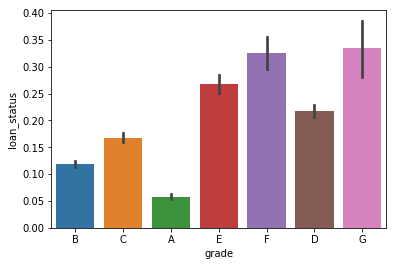

In [299]:
sns.barplot(x='grade', y='loan_status', data=df)
plt.show()

In [300]:
def plot_cat(cat_var):
    sns.barplot(x=cat_var, y='loan_status', data=df)
    plt.show()

Plot default rates against each grade of loan

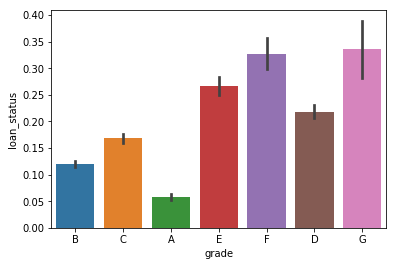

In [301]:
plot_cat('grade')

We can see that the loan default rate increases from Grade A to Grade G.  This makes sense as the Grade is based on riskiness of the loan.

Next, I want to see if the term makes any difference to loan default.

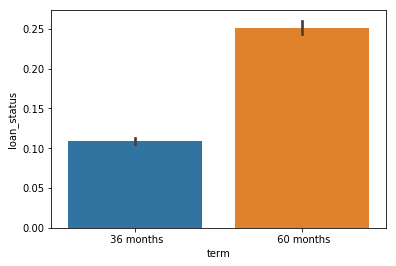

In [302]:
plot_cat('term')

Next, I am going to review how each sub-grade compares to the default rate.

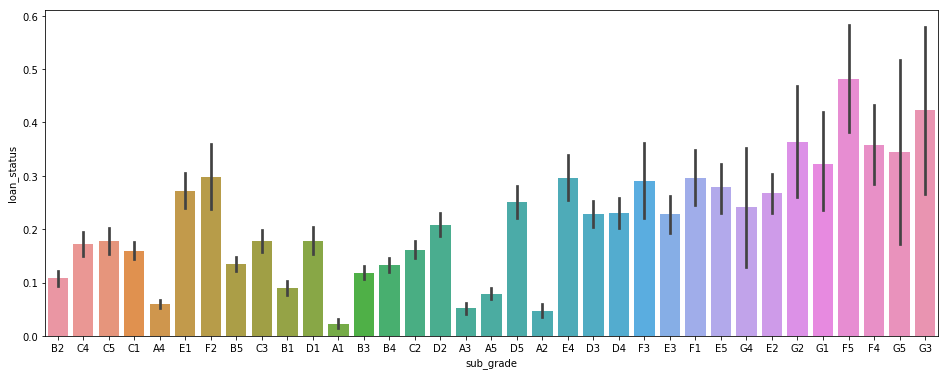

In [303]:
plt.figure(figsize=(16, 6))
plot_cat('sub_grade')

The sub-grades fllow the same trend as grades, as expeced.

Next, I will look at verification status vs loan status.  The verification status indicates if income was verified by LC, not verified, or if the income source was verified 

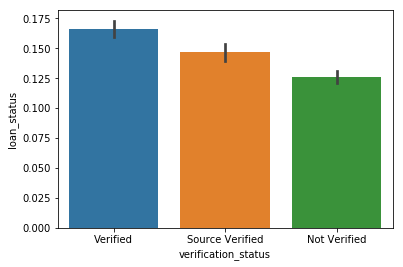

In [304]:
plot_cat('verification_status')

Surpriselingly, here we see that there is a higher default rate when income is verified. That siad,this is likely not a significant indicator, as there is no large difference in loan status based on verification status.

Home ownership vs loan status

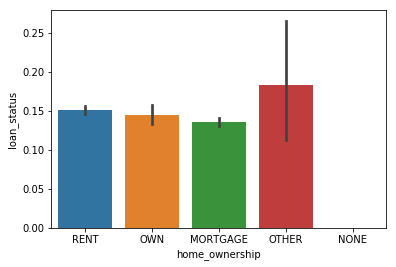

In [305]:
plot_cat('home_ownership')

Not a great predictor as there is not much difference between the categories.

Purpose of loan vs loan status

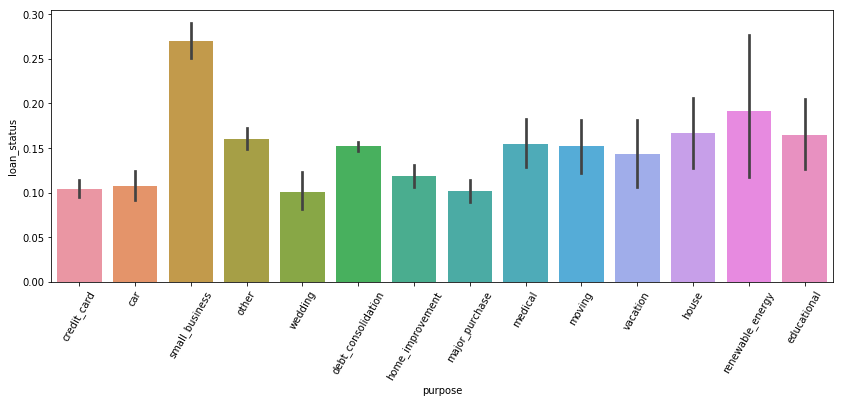

In [306]:
plt.figure(figsize=(14, 5))
plt.xticks(rotation=60)
plot_cat('purpose')

We see that small business loans default the most, then renewable energy and education

In [307]:
df['issue_d'].head()

0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

In [308]:
df['issue_d'] = df['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))

In [309]:
df['month'] = df['issue_d'].apply(lambda x: x.month)
df['year'] = df['issue_d'].apply(lambda x: x.year)

In [310]:
df.groupby('year').year.count()

year
2007      251
2008     1562
2009     4716
2010    11214
2011    19801
Name: year, dtype: int64

In [311]:
df.groupby('month').month.count()

month
1     2331
2     2278
3     2632
4     2756
5     2838
6     3094
7     3253
8     3321
9     3394
10    3637
11    3890
12    4120
Name: month, dtype: int64

Most loans are granted in December, and in general in the latter half of the year.

Let's compare the default rates across years

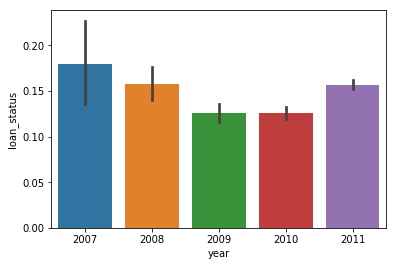

In [312]:
plot_cat('year')

We can see a very interesting trend here, where the default rate had suddenly increased in 2011, after 3 years of year-over-year reductions in loan defaults.

Loan status across months

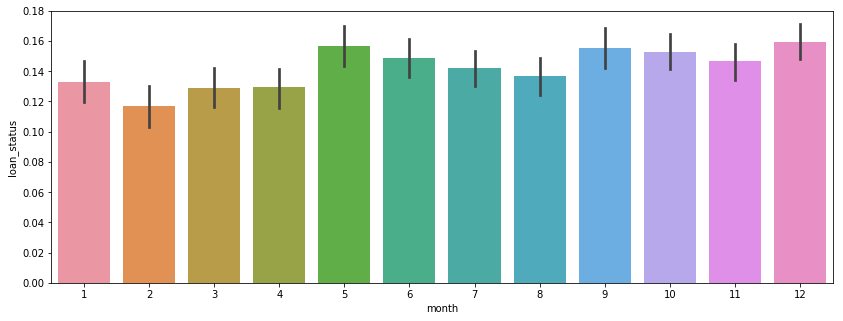

In [313]:
plt.figure(figsize=(14,5))
plot_cat('month')

Let's now assess how the default rate varies across continuous variables.

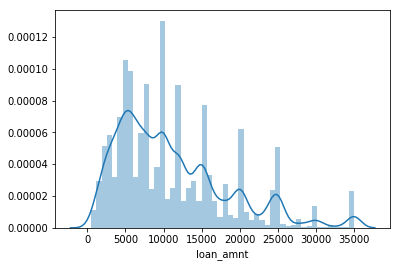

In [314]:
sns.distplot(df['loan_amnt'])
plt.show()

The easiest way to analyse how default rates vary across continous variables is to bin the variables into discrete categories.

Let's bin the loan amount variable into small, medium, high, very high.  The median loan amount is around $10,000

In [315]:
def loan_amount(n):
    if n < 5000:
        return 'low'
    elif n >=5000 and n < 15000:
        return 'medium'
    elif n >= 15000 and n < 25000:
        return 'high'
    else:
        return 'very high'
        
df['loan_amnt'] = df['loan_amnt'].apply(lambda x: loan_amount(x))

In [316]:
df['loan_amnt'].value_counts()

medium       20157
high          7572
low           7095
very high     2720
Name: loan_amnt, dtype: int64

Default rates vs. loan amount.

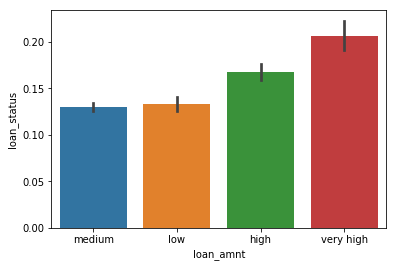

In [317]:
plot_cat('loan_amnt')

We can see the higher the loan the higher teh default rate.

Let's also convert funded amount invested to bins.  FYI - Funded amount invested is the total amount committed by investors for that loan at that point in time.

In [318]:
df['funded_amnt_inv'] = df['funded_amnt_inv'].apply(lambda x: loan_amount(x))

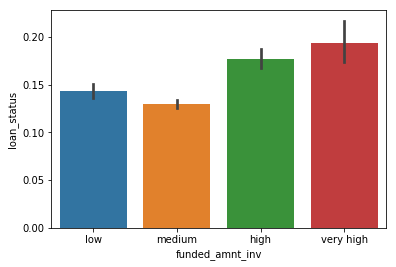

In [319]:
plot_cat('funded_amnt_inv')

We see that the higher the amount committed by the investors, the higher the default rate.

Next we will compare default rates across interest rates.  I created a function to convert to bins.

In [320]:
def int_rate(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=15:
        return 'medium'
    else:
        return 'high'

In [321]:
df['int_rate'] = df['int_rate'].apply(lambda x: int_rate(x))

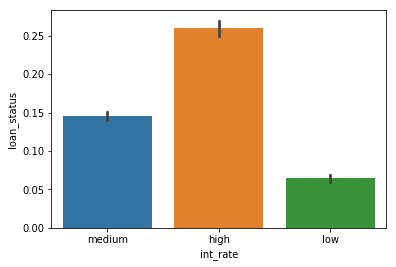

In [322]:
plot_cat('int_rate')

And, as expected, there are jigher default rates as the interest rates increase.

Now, let's take a look at the debt to income ratio vs default rates.  First a fucntion to convert to bins

In [323]:
def dti(n):
    if n <= 10:
        return 'low'
    elif n > 10 and n <=20:
        return 'medium'
    else:
        return 'high'

In [324]:
df['dti'] = df['dti'].apply(lambda x: dti(x))

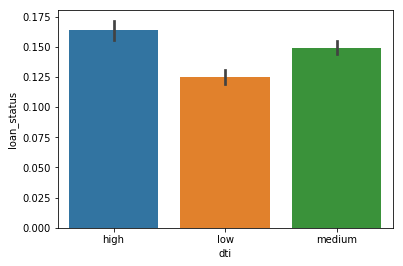

In [325]:
plot_cat('dti')

And, as expected teh higher the debt to income results in a higher default rate.

Let's also look at the total mount of the loan, funded_amount.

In [326]:
def funded_amount(n):
    if n <= 5000:
        return 'low'
    elif n > 5000 and n <=15000:
        return 'medium'
    else:
        return 'high'

In [327]:
df['funded_amnt'] = df['funded_amnt'].apply(lambda x: funded_amount(x))

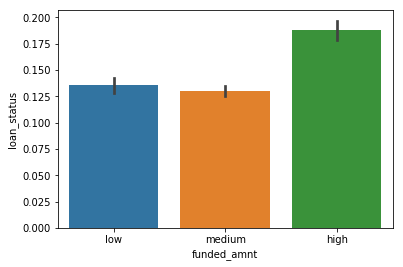

In [328]:
plot_cat('funded_amnt')

Installment vs default rate

In [329]:
def installment(n):
    if n <= 200:
        return 'low'
    elif n > 200 and n <=400:
        return 'medium'
    elif n > 400 and n <=600:
        return 'high'
    else:
        return 'very high'


In [330]:
df['installment'] = df['installment'].apply(lambda x: installment(x))

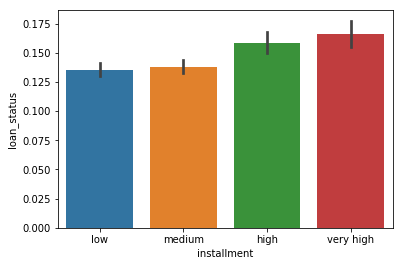

In [331]:
plot_cat('installment')

We can see that as the installment amount increases, so does the default rate.

Annnual income vs default rate

In [332]:
def annual_income(n):
    if n <= 50000:
        return 'low'
    elif n > 50000 and n <=100000:
        return 'medium'
    elif n > 100000 and n <=150000:
        return 'high'
    else:
        return 'very high'

In [333]:
df['annual_inc'] = df['annual_inc'].apply(lambda x: annual_income(x))

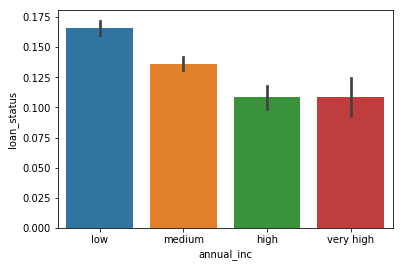

In [334]:
plot_cat('annual_inc')

This tells us that the lower in the income, the higher the likelihood to dafault.

Employment length vs default rate

In [335]:
def emp_length(n):
    if n <= 1:
        return 'entry-level'
    elif n > 1 and n <=3:
        return 'junior'
    elif n > 3 and n <=7:
        return 'intermediate'
    else:
        return 'senior'

In [336]:
df['emp_length'] = df['emp_length'].apply(lambda x: emp_length(x))

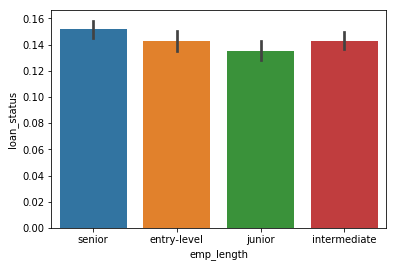

In [337]:
plot_cat('emp_length')

Surprisingly, employment length is not much a predictor on defaults rate.

## Segmented Univariate Analysis

We have now compared the default rates across various variables, and some of the important predictors are purpose of the loan, interest rate, annual income, grade etc.

In the credit industry, one of the most important factors affecting default is the purpose of the loan - home loans perform differently than credit cards, credit cards are very different from debt condolidation loans etc. 

This comes from business understanding, though let's again have a look at the default rates across the purpose of the loan.


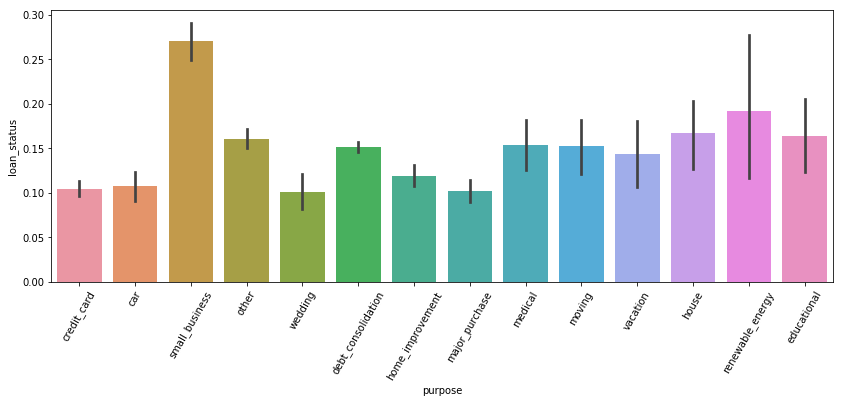

In [338]:
plt.figure(figsize=(14, 5))
plt.xticks(rotation=60)
plot_cat('purpose')

In the next section, we will segment the loan applications across the purpose of the loan, since that is a variable affecting many other variables - the type of applicant, interest rate, income, and finally the default rate.

We will first look at the number of loans for each purpose type.

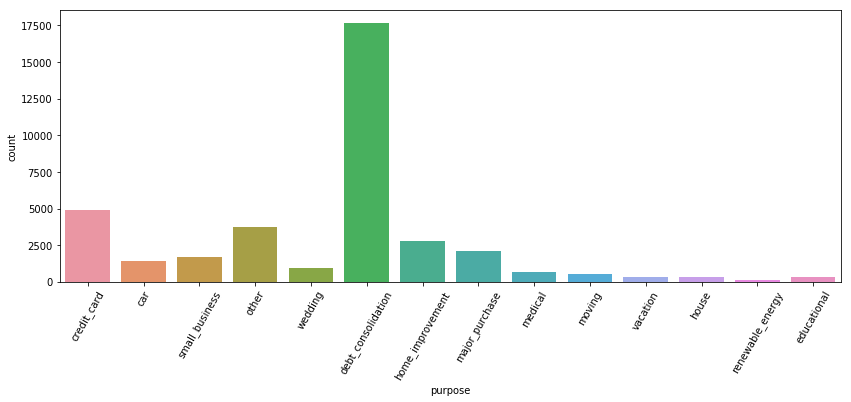

In [342]:
plt.figure(figsize=(14, 5))
sns.countplot(x='purpose', data=df)
plt.xticks(rotation=60)
plt.show()

We see that most loans are debt consolidation, then credit card, major purchase etc.

In [343]:
main_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase"]
df = df[df['purpose'].isin(main_purposes)]
df['purpose'].value_counts()

debt_consolidation    17675
credit_card            4899
home_improvement       2785
major_purchase         2080
Name: purpose, dtype: int64

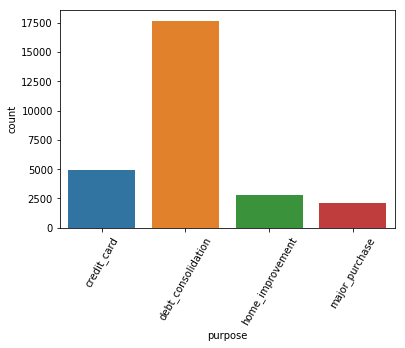

In [345]:
sns.countplot(x=df['purpose'])
plt.xticks(rotation=60)
plt.show()

Let's now compare the default rates across two types of categorical variables:

purpose of loan (constant) and another categorical variable (which changes)

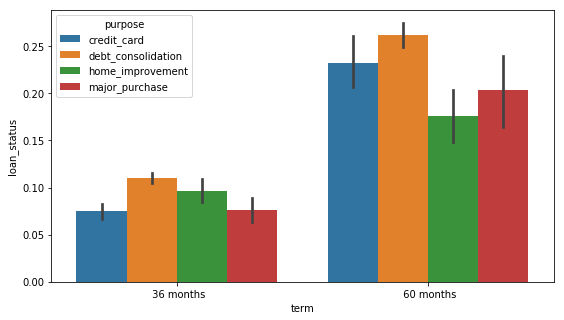

In [349]:
plt.figure(figsize=[9, 5])
sns.barplot(x='term', y="loan_status", hue='purpose', data=df)
plt.show()

In [350]:
def plot_segmented(cat_var):
    plt.figure(figsize=(10, 6))
    sns.barplot(x=cat_var, y='loan_status', hue='purpose', data=df)
    plt.show()

Test - we should get the same chart as above

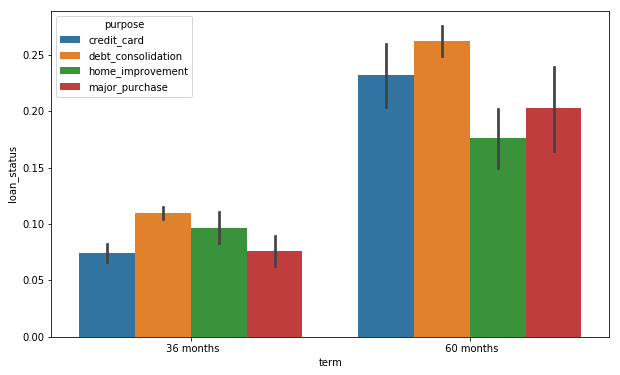

In [351]:
plot_segmented('term')

Let'splot grade of the loan over main purpose

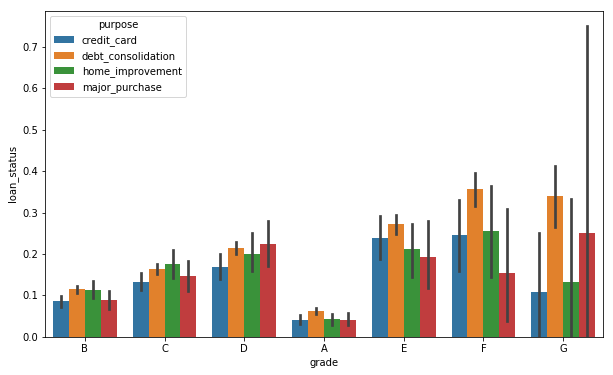

In [352]:
plot_segmented('grade')

Home ownership vs main purpose

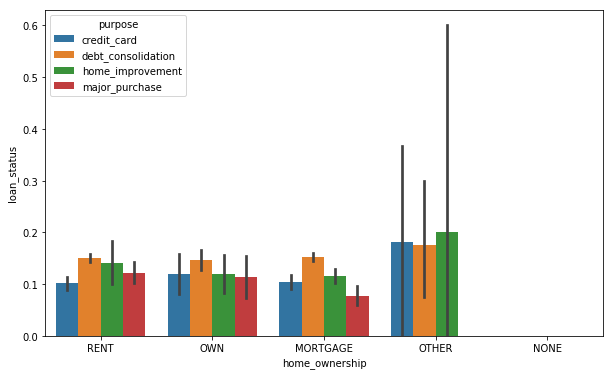

In [353]:
plot_segmented('home_ownership')

In general, we can say that debt consolidation loans have the highest default rates. 

Lets compare across other categories as well.

Loan Amount vs Main purpuse

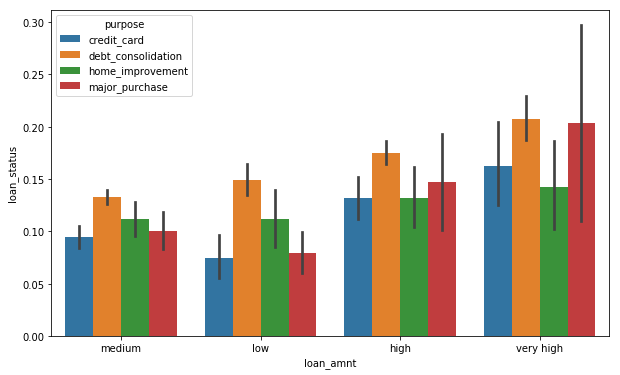

In [357]:
plot_segmented('loan_amnt')

Year vs Main purpose

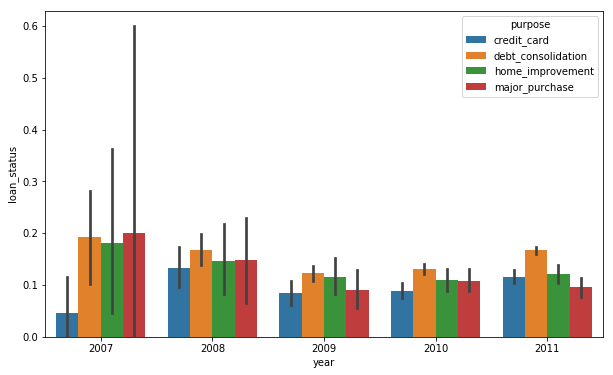

In [358]:
plot_segmented('year')

Employment Length vs Main purpose

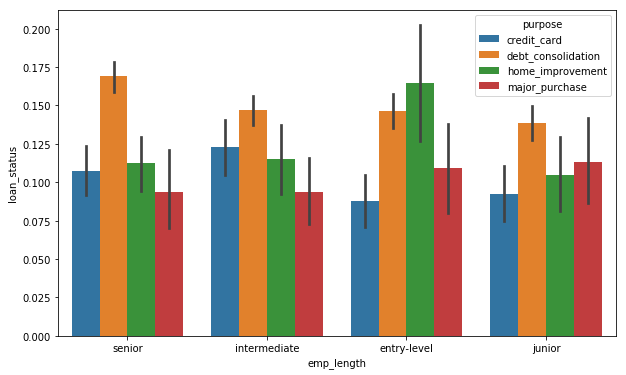

In [359]:
plot_segmented('emp_length')

Installment vs Main purpose

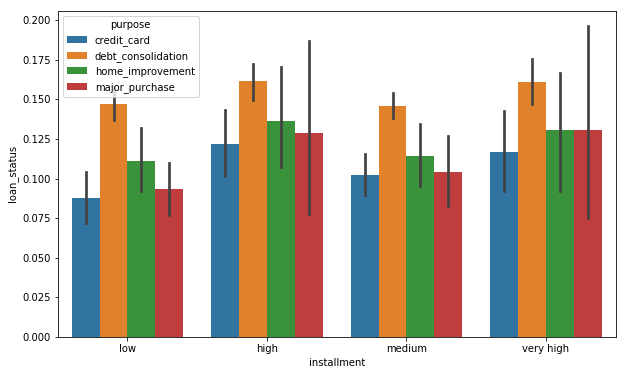

In [360]:
plot_segmented('installment')

Interest rate vs Main purpose

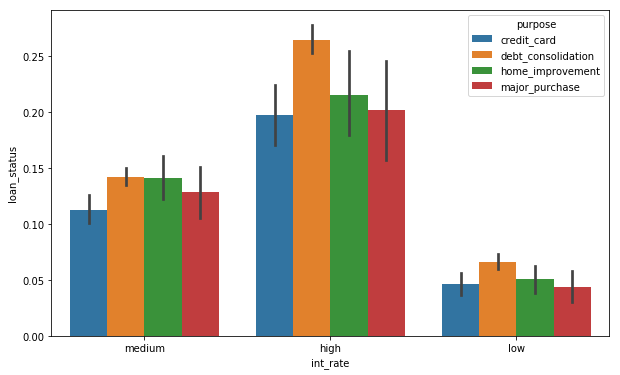

In [361]:
plot_segmented('int_rate')

Annual income vs Main purpose

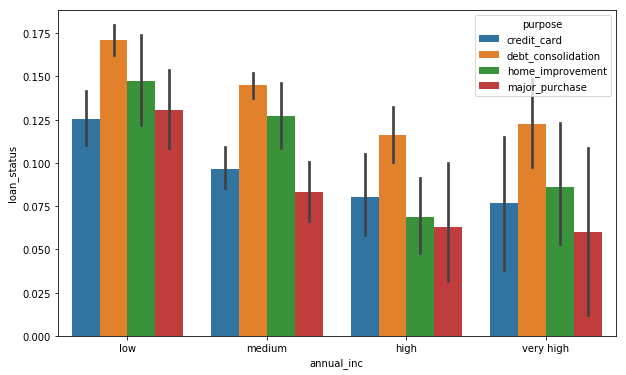

In [362]:
plot_segmented('annual_inc')

Debt-to-income ratio vs Main purpose

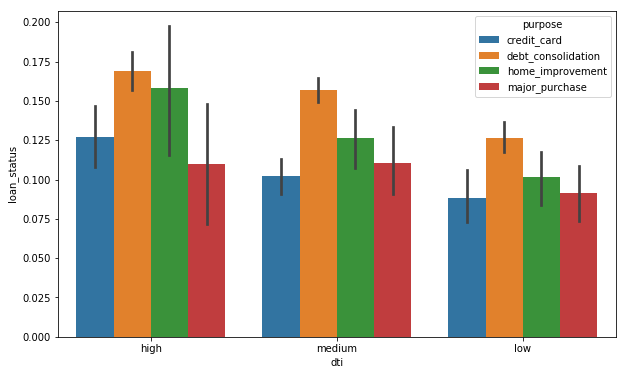

In [363]:
plot_segmented('dti')

A good way to quantify the effect of a categorical variable on default rate is to see 'how much does the default rate vary across the categories'. 

Let's see an example using annual_inc as the categorical variable.

In [364]:
df.groupby('annual_inc').loan_status.mean().sort_values(ascending=False)

annual_inc
low          0.157966
medium       0.130075
very high    0.101570
high         0.097749
Name: loan_status, dtype: float64

one can write a function which takes in a categorical variable and computed the average 
default rate across the categories.<br>
It can also compute the 'difference between the highest and the lowest default rate' across the 
categories, which is a decent metric indicating the effect of the varaible on default rate

In [366]:
def diff_rate(cat_var):
    default_rates = df.groupby(cat_var).loan_status.mean().sort_values(ascending=False)
    return (round(default_rates, 2), round(default_rates[0] - default_rates[-1], 2))

default_rates, diff = diff_rate('annual_inc')
print(default_rates) 
print(diff)

annual_inc
low          0.16
medium       0.13
very high    0.10
high         0.10
Name: loan_status, dtype: float64
0.06


Thus, there is a 6% increase in default rate as you go from high to low annual income. We can compute this difference for all the variables and roughly identify the ones that affect default rate the most.

In [367]:
# filtering all the object type variables
df_categorical = df.loc[:, df.dtypes == object]
df_categorical['loan_status'] = df['loan_status']

# Now, for each variable, we can compute the incremental diff in default rates
print([i for i in df.columns])

['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'dti', 'initial_list_status', 'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'month', 'year']


In [368]:
# storing the diff of default rates for each column in a dict
d = {key: diff_rate(key)[1]*100 for key in df_categorical.columns if key != 'loan_status'}
print(d)

{'loan_amnt': 7.000000000000001, 'funded_amnt': 5.0, 'funded_amnt_inv': 6.0, 'term': 15.0, 'int_rate': 19.0, 'installment': 3.0, 'grade': 27.0, 'sub_grade': 46.0, 'emp_title': 100.0, 'emp_length': 2.0, 'home_ownership': 16.0, 'annual_inc': 6.0, 'verification_status': 4.0, 'pymnt_plan': 0.0, 'purpose': 5.0, 'zip_code': 100.0, 'addr_state': 60.0, 'dti': 5.0, 'initial_list_status': 0.0}
